In [8]:
# Import libraries
import os
print(os.getcwd())

import sys
sys.path.append(r'C:\Users\Kehan\Desktop\kh\2025\GitHub\GitHubPush\SellSideQuant\1_BSDynamicalDeltaHedge\v1')


D:\Jupyter Notebook


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from DynamicDeltaHedging import DynamicDeltaHedge

# === Parameters ===
params = {
    "S0": 10,
    "K": 10,
    "T": 1.0,
    "r": 0.05,
    "sigma": 0.4,
    "mu": 0.2,
    "lamb": 0.5,
    "mu_j": -0.2,
    "sigma_j": 0.1,
    "include_jumps": True,
    "seed": 42,
    "option_size": -1,
}



In [11]:
# Create an instance of the class
ddh = DynamicDeltaHedge(**params)

# Hedging frequencies to compare
frequencies = {
    "Quarterly (N=4)": 4,
    "Monthly (N=12)": 12,
    "Daily (N=252)": 252,
    "High Freq (N=2016)": 8 * 252
}



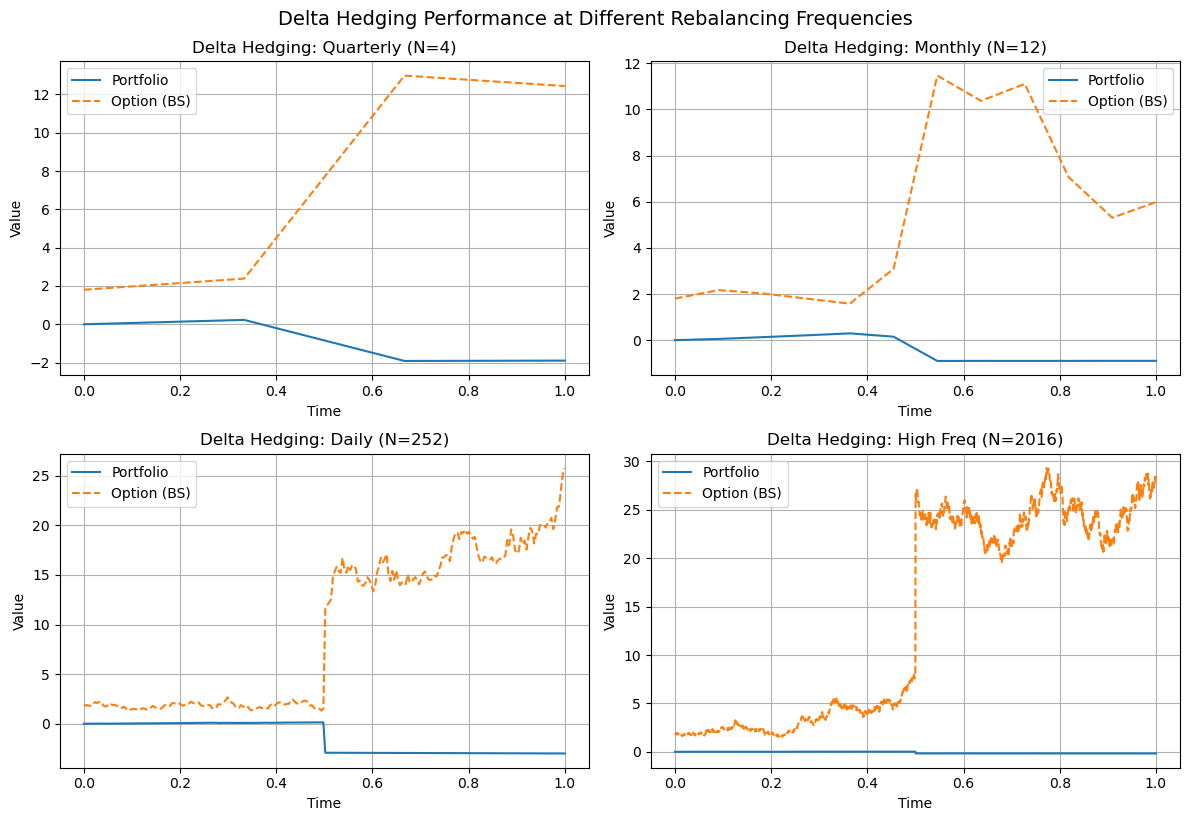

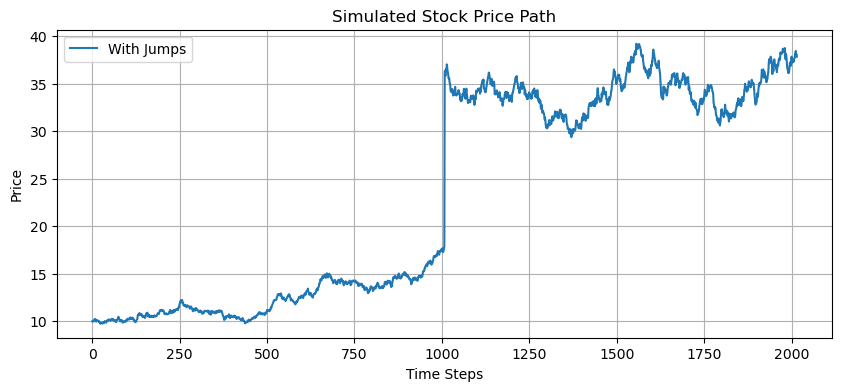

In [12]:
plt.figure(figsize=(12, 8))

for i, (label, N) in enumerate(frequencies.items(), 1):
    t = np.linspace(0, params["T"], N)
    dt = params["T"] / N
    S = ddh.simulate_stock_path(N)
    portfolio_value = ddh.delta_hedge(S, t, dt)
    option_values = [ddh.bs_call_price(S[j], params["K"], params["T"], params["r"], params["sigma"], t[j]) for j in range(N)]

    plt.subplot(2, 2, i)
    plt.plot(t, portfolio_value, label="Portfolio")
    plt.plot(t, option_values, label="Option (BS)", linestyle='--')
    plt.title(f"Delta Hedging: {label}")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.suptitle("Delta Hedging Performance at Different Rebalancing Frequencies", fontsize=14, y=1.02)
plt.show()

# Plot Simulated Stock Price path
label = "With Jumps" if params["include_jumps"] else "GBM Only"
plt.figure(figsize=(10, 4))
plt.plot(S, label=label)
plt.title("Simulated Stock Price Path")
plt.xlabel("Time Steps")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()